In [76]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [66]:
iris = pd.read_excel('iris.xlsx')
X = iris.drop(columns=['Species'])
Y = iris['Species']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=50)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=50)
model=DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=5)
model.fit(X_train, Y_train)
predictions_dt = model.predict(X_valid)

score = accuracy_score(Y_valid, predictions_dt)
score

0.9

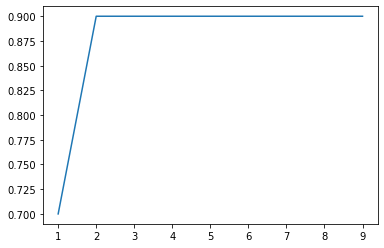

In [67]:
depth=np.arange(1,10)
score=[]

for i in depth:
    model=DecisionTreeClassifier(criterion="gini", max_depth=i, min_samples_leaf=5)
    model.fit(X_train, Y_train)
    predictions_dt = model.predict(X_valid)

    score.append(accuracy_score(Y_valid, predictions_dt))
plt.plot(depth,np.array(score))
plt.show()


In [68]:
model=DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_leaf=5)
model.fit(X_train, Y_train)
predictions_dt_test = model.predict(X_test)

score = accuracy_score(Y_test , predictions_dt_test)
score

0.9666666666666667

In [69]:
c=confusion_matrix(Y_test,predictions_dt_test)
c

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

In [70]:
#overall accuracy
(c[0,0]+c[1,1]+c[2,2])/np.sum(c)*100

96.66666666666667

In [71]:
#sensitivity
c[0,0]/np.sum(c[0,:])

1.0

In [72]:
#precision
c[0,0]/np.sum(c[:,0])

1.0

In [73]:
#specificity
num=c[1,1]+c[2,2]
den=np.sum(c[1,:])+np.sum(c[2,:])
num/den

0.9523809523809523

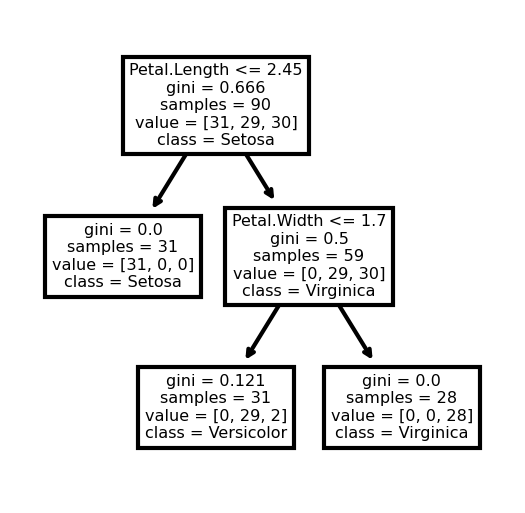

In [96]:
#plot decision tree
fig, axes=plt.subplots(figsize=(2,2),dpi=300)
plot_tree(model, feature_names=list(X), class_names=["Setosa", "Versicolor", "Virginica"],
               filled = False)
plt.show()

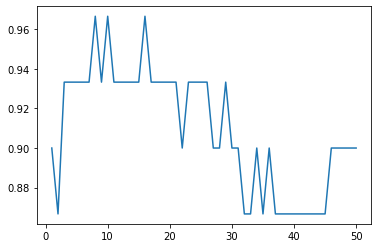

In [81]:
neighbors=list(range(1,51))
accuracy_scores=[]

for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, Y_train)
    predicted_values = knn.predict(X_valid)
    scores = accuracy_score(Y_valid , predicted_values)
    accuracy_scores.append(scores)
plt.plot(neighbors,np.array(accuracy_scores))

In [89]:
knn= KNeighborsClassifier(n_neighbors=8, metric='euclidean')
knn.fit(X_train, Y_train)
predicted_knn_test = knn.predict(X_test)
score_knn = accuracy_score(Y_test , predicted_knn_test)
score_knn

0.9666666666666667

In [91]:
c=confusion_matrix(Y_test , predicted_knn_test)
c

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  9]], dtype=int64)

In [92]:
#overall accuracy
(c[0,0]+c[1,1]+c[2,2])/np.sum(c)*100

96.66666666666667

In [93]:
#sensitivity
c[0,0]/np.sum(c[0,:])

1.0

In [94]:
#precision
c[0,0]/np.sum(c[:,0])

1.0

In [95]:
#specificity
num=c[1,1]+c[2,2]
den=np.sum(c[1,:])+np.sum(c[2,:])
num/den

0.9523809523809523